# **Analyzing Employee attrition in Company X.**

## **Introduction.** 

### **Undestanding Attrition.** 

One defination of **attrition** by [merriam-webster.com](https://www.merriam-webster.com/dictionary/attrition) describes it as; ***a reduction in the number of employees or participants that occurs when people leave because they resign, retire, etc., and are not replaced.*** This definition precisely describes what our project is all about. By general knowledge we know that there might be quite a number of reasons an employee might choose to leave a company. 

The project seeks to explore data about factors that affect employee attrition and how the relate to one another. To mention just but a few of the factors represented by the datapoints include; employee satisfaction level, last evalution, project number,promotion in the last five year, department, salary, total work hours per month, etc.

Inorder to understand and give meaning insights from our data we apply the use of data science techniques like data cleaning, exploratory data analysis(EDA), machine learning and a litle bit of machine learning for prediction. To achieve this we make use of various data science tools like `numpy`, `pandas`,'`dash`, `matplotlib`, `seaborn`, `scikit learn` and others. 

Each and every tool mentioned above has specific application in the project. i.e,
 - `Numpy` - useful in numerical data manipulation, [more info.](https://numpy.org/).
 - `Pandas` - For exploring data in for of data frames [more info.](https://pandas.pydata.org/)
 - `Matplotlib` and `Seaborn` - for making data visualizations, [more info on matplolib](https://matplotlib.org/), [info on seaborn](https://seaborn.pydata.org/).
 - `Dash` - Useful in making dashboards [more info](https://plotly.com/dash/).
 
# **Step 1.**

The first step in out project in to load and import the `python` packages we might need. If the packages are not alread installed, we might need to install them using the [python packaging manager(pip)](https://pypi.org/project/pip/). `Pip` is an official tool specific to `python` language for installing, updating and uninstalling python packages. 






In [26]:
%%capture
# install packages if not present
!pip install seaborn

In [27]:
#import required packages
import pandas  as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [28]:
#load data 
#Existing employee data in sheet1 into data1
data1 = pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx',sheet_name=1)
#employees who left into data2 
data2 = pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx',sheet_name=2)

#introduce column 'Attrition' to indicate attrition if the  employees left or stayed
data1.insert(1, 'Attrition', 0)

data2.insert(1, 'Attrition', 1)


In [29]:
#combine the two dataframes 
full_data = pd.concat([data1,data2])
#the a look at the first few records of the data
full_data.head(5)


,Emp ID,Attrition,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0,0.49,0.60,3,214,2,0,0,sales,low


In [30]:
#peak at the last few records of data
full_data.tail(5)

,Emp ID,Attrition,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
3566,14995,1,0.40,0.57,2,151,3,0,0,support,low
3567,14996,1,0.37,0.48,2,160,3,0,0,support,low
3568,14997,1,0.37,0.53,2,143,3,0,0,support,low
3569,14998,1,0.11,0.96,6,280,4,0,0,support,low
3570,14999,1,0.37,0.52,2,158,3,0,0,support,low


In [31]:
#check for missing values 
full_data.isnull().any()

Emp ID                   False
Attrition                False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
dtype: bool

In [32]:
#check the number who left and those who did not
full_data["Attrition"].value_counts()

0    11428
1     3571
Name: Attrition, dtype: int64

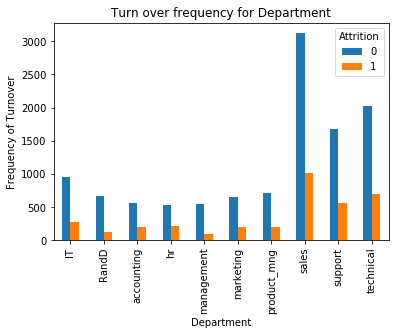

In [33]:
#do visualitions
pd.crosstab(full_data.dept,full_data.Attrition).plot(kind='bar')
plt.title('Turn over frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

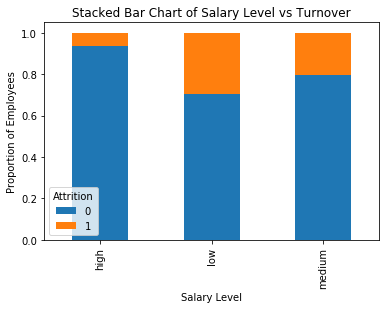

In [34]:
#Bar chart for employee salary level and the frequency of turnover
table=pd.crosstab(full_data.salary, full_data.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [35]:
#Proportion of employees who left by department
pd.crosstab(full_data.dept,full_data.Attrition)

Attrition,0,1
dept,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


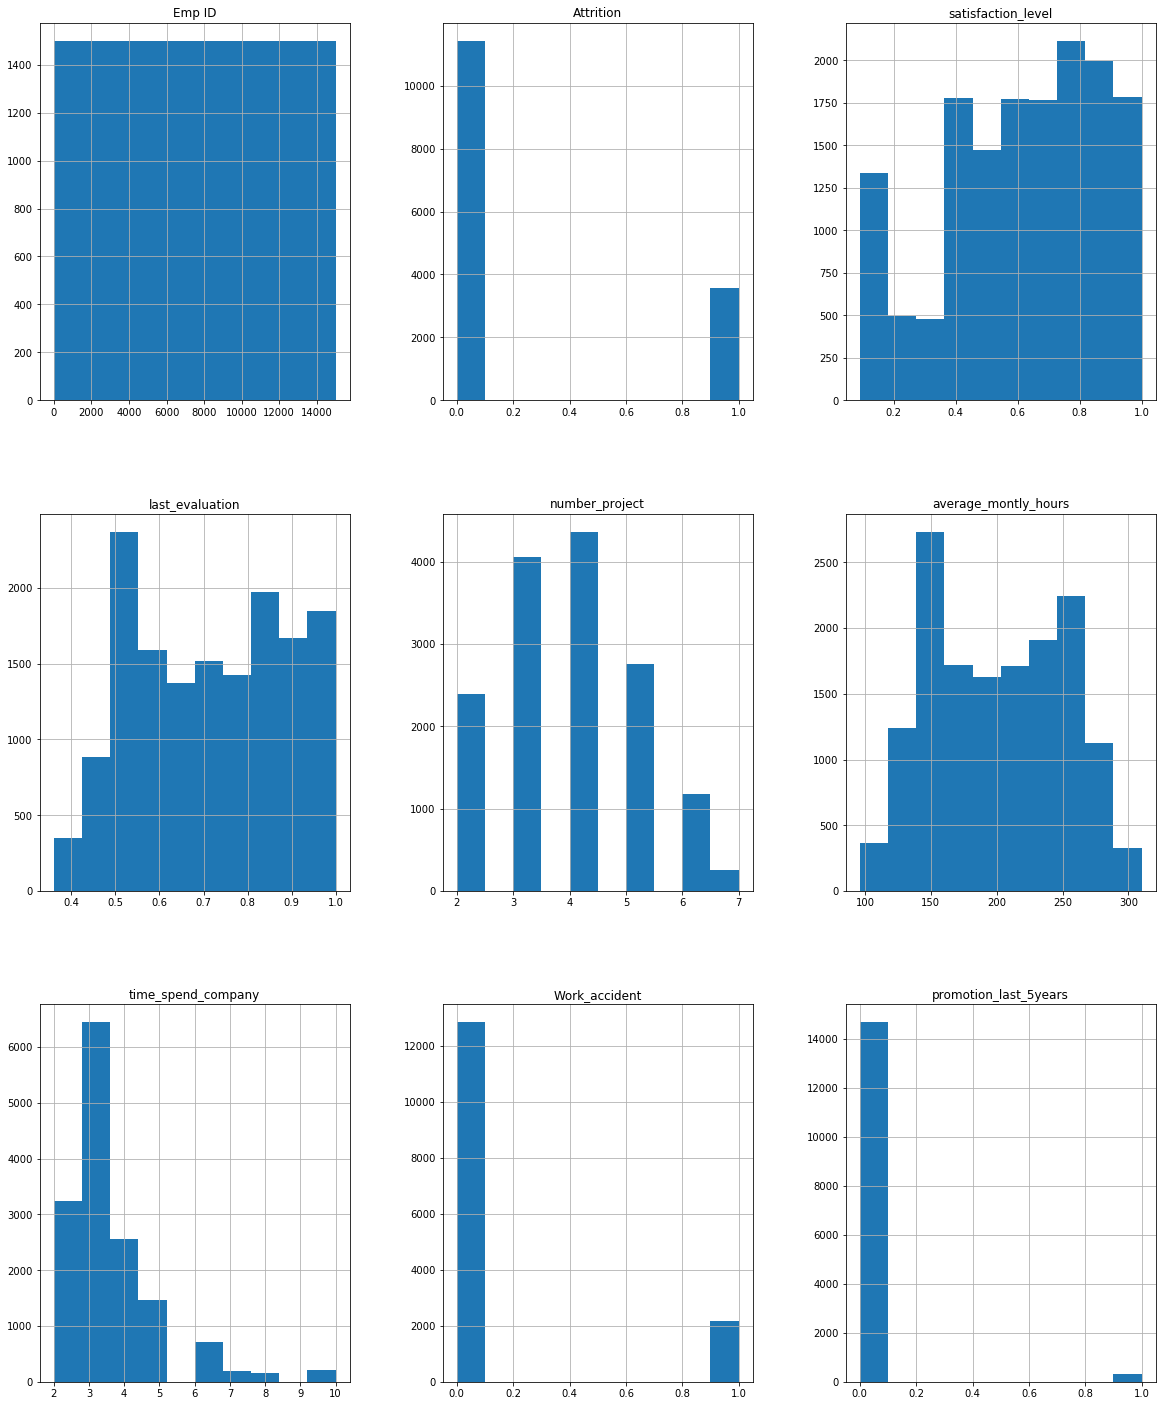

In [36]:
#Histogram of numerical variables 
num_bins = 10 
full_data.hist(bins=num_bins,figsize=(20,25))
plt.savefig("hr_histogram_plots")
plt.show()

In [37]:
#create dummy variables for categorical variables 
categorical_variables = ['dept','salary']
for var in categorical_variables:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(full_data[var],prefix=var)
    full_data1 = full_data.join(cat_list)
    full_data = full_data
    

In [38]:
full_data.drop(full_data.columns[[9,10]],axis=1,inplace=True)

In [39]:
full_data.columns.values

array(['Emp ID', 'Attrition', 'satisfaction_level', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years'], dtype=object)

In [40]:
full_data_vars = full_data.columns.values.tolist()
y=['Attrition']
X=[i for i in full_data_vars if i not in y]
X

['Emp ID',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Recursive feature elimination (RFE)
model = LogisticRegression()
rfe = RFE(model,10)
rfe = rfe.fit(full_data[X],full_data[y])
print(rfe.support_)
print(rfe.ranking_)

/home/none/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/none/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


In [42]:
cols = [ 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']
X = full_data[cols]
y = full_data['Attrition']


In [43]:
#Logistic regression model 
#split the data into training and test samples 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#create a model and train 
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
#predict the results for the test
test_pred = model.predict(X_test)

#test the accuracy 
accuracy_score(y_test,test_pred)

0.9924444444444445

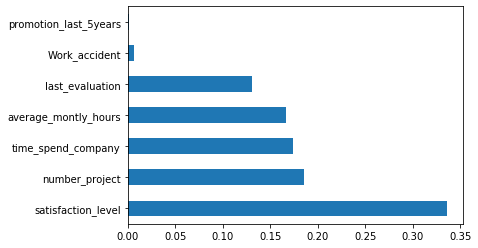

In [46]:
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances= feat_importances.nlargest(20)
feat_importances.plot(kind='barh')
plt.savefig('feat_importances_barh')
plt.show()